## Load and analyze DMPS @ Zeppelin

In [144]:
import dominics_functions as fu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns
import scipy as sc

# These lines auto-updates the functions in other packages which is useful if these functions are changed. 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
path = 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\'

In [146]:
import glob 
glob.glob(path+'\\*')

['C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2010_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2011_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2012_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2013_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2014_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2015_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010

In [147]:
DFs_2010_2020 = fu.load_and_append_2010_2020(path, 
                             name_in_file='DMPS')

['Year', 'Month', 'Day', 'Hour', 'Minute', 'UFCPC', 'CPC3010', 'Ntot', 'unknown4', 'unknown5', 'unknown6', 'unknown7', 'unknown8', '5.0118723e-09', '5.6234133e-09', '6.3095734e-09', '7.0794578e-09', '7.9432823e-09', '8.9125094e-09', '1.0000000e-08', '1.1220185e-08', '1.2589254e-08', '1.4125375e-08', '1.5848932e-08', '1.7782794e-08', '1.9952623e-08', '2.2387211e-08', '2.5118864e-08', '2.8183829e-08', '3.1622777e-08', '3.5481339e-08', '3.9810717e-08', '4.4668359e-08', '5.0118723e-08', '5.6234133e-08', '6.3095734e-08', '7.0794578e-08', '7.9432823e-08', '8.9125094e-08', '1.0000000e-07', '1.1220185e-07', '1.2589254e-07', '1.4125375e-07', '1.5848932e-07', '1.7782794e-07', '1.9952623e-07', '2.2387211e-07', '2.5118864e-07', '2.8183829e-07', '3.1622777e-07', '3.5481339e-07', '3.9810717e-07', '4.4668359e-07', '5.0118723e-07', '5.6234133e-07', '6.3095734e-07', '7.0794578e-07', 'flag']
C:\Users\Lovisa\Documents\Courses II\E_science_tools HT22\Project\DATA_ZEP_2010to2020\DMPS_and_CPC_2010_QA_QC@STP

In [148]:
fu.get_columns_2010_2020?

In [149]:
df_2010_2020 = fu.concat_df_2010_2020(DFs_2010_2020)
dict_years_to_df = {"2010_2020":df_2010_2020}

In [150]:
uniqueFlags = df_2010_2020['flag'].unique()
flags = df_2010_2020['flag'].values
nanFlags = np.isnan(flags)

In [151]:
nanFlags[nanFlags == True]

array([], dtype=bool)

In [152]:
nanFlags[nanFlags]

array([], dtype=bool)

In [153]:
bin_col_names_2010_2020 = ['5.0118723e-09', '5.6234133e-09', '6.3095734e-09',
   '7.0794578e-09', '7.9432823e-09', '8.9125094e-09', '1.0000000e-08',
   '1.1220185e-08', '1.2589254e-08', '1.4125375e-08', '1.5848932e-08',
   '1.7782794e-08', '1.9952623e-08', '2.2387211e-08', '2.5118864e-08',
   '2.8183829e-08', '3.1622777e-08', '3.5481339e-08', '3.9810717e-08',
   '4.4668359e-08', '5.0118723e-08', '5.6234133e-08', '6.3095734e-08',
   '7.0794578e-08', '7.9432823e-08', '8.9125094e-08', '1.0000000e-07',
   '1.1220185e-07', '1.2589254e-07', '1.4125375e-07', '1.5848932e-07',
   '1.7782794e-07', '1.9952623e-07', '2.2387211e-07', '2.5118864e-07',
   '2.8183829e-07', '3.1622777e-07', '3.5481339e-07', '3.9810717e-07',
   '4.4668359e-07', '5.0118723e-07', '5.6234133e-07', '6.3095734e-07',
   '7.0794578e-07']

def get_bins(bin_col_names_2010_2020):
    bin_col_names_2010_2020_floats = [float(i)*10**9 for i in bin_col_names_2010_2020]
    bin_cols = np.around(bin_col_names_2010_2020_floats,decimals=3)
    bin_cols = np.asarray(bin_cols)
    bin_cols = [str(x) for x in bin_cols] # Loop over all list things and change them to str 
    return bin_cols

In [154]:
def renameDpColumns(df_2010_2020, bin_col_names_2010_2020):
    bin_cols = get_bins(bin_col_names_2010_2020)

    # Rename all columns 
    
    dict_cols_to_goodnames = dict(zip(bin_col_names_2010_2020, bin_cols))
   
    df_2010_2020 = df_2010_2020.rename(dict_cols_to_goodnames, axis=1)
    
    return df_2010_2020

In [155]:
df_2010_2020 = renameDpColumns(df_2010_2020, bin_col_names_2010_2020)
df_2010_2020.head(10)
print(df_2010_2020['flag'].unique())

[0.]


In [156]:
# Make a list of all the "real" diameters

GMDs = ['5.0118723e-09', '5.6234133e-09', '6.3095734e-09',
       '7.0794578e-09', '7.9432823e-09', '8.9125094e-09', '1.0000000e-08',
       '1.1220185e-08', '1.2589254e-08', '1.4125375e-08', '1.5848932e-08',
       '1.7782794e-08', '1.9952623e-08', '2.2387211e-08', '2.5118864e-08',
       '2.8183829e-08', '3.1622777e-08', '3.5481339e-08', '3.9810717e-08',
       '4.4668359e-08', '5.0118723e-08', '5.6234133e-08', '6.3095734e-08',
       '7.0794578e-08', '7.9432823e-08', '8.9125094e-08', '1.0000000e-07',
       '1.1220185e-07', '1.2589254e-07', '1.4125375e-07', '1.5848932e-07',
       '1.7782794e-07', '1.9952623e-07', '2.2387211e-07', '2.5118864e-07',
       '2.8183829e-07', '3.1622777e-07', '3.5481339e-07', '3.9810717e-07',
       '4.4668359e-07', '5.0118723e-07', '5.6234133e-07', '6.3095734e-07',
       '7.0794578e-07']
diameterList = [float(i) for i in GMDs]
diameters = np.asarray(diameterList)
print(diameters.shape)

(44,)


In [157]:
dict_years_to_df = fu.resample_dfs(dict_years_to_df, "2010_2020")

### Resampling 

In [237]:
df_daily_2010_2020_mean = df_2010_2020.resample('D').mean()
df_daily_2010_2020_mean = df_daily_2010_2020_mean.dropna(how='all')

df_daily_2010_2020_median = df_2010_2020.resample('D').median()
print(len(df_daily_2010_2020_median))
df_daily_2010_2020_median = df_daily_2010_2020_median.dropna(how='all') 
# resample fills the gaps with nan's. All rows where all are equal to nan are dropped

df_hourly_2010_2020_mean = df_2010_2020.resample('H').mean()
df_hourly_2010_2020_mean = df_hourly_2010_2020_mean.dropna(how='all')

3804


In [242]:
df_dmps_for_Kei = df_daily_2010_2020_mean.copy()
df_dmps_for_Kei.to_csv(r'C:\Users\Lovisa\Documents\GitHub\Tjaernoe2022-group3\data_frame_to_Kei.csv', index = False, header=True)

In [159]:
#df_aug04 = df_2010_2020[('2010-08-04' < df_2010_2020.index) & (df_2010_2020.index < '2010-08-05')]

In [160]:
df_hourly_2010_2020_mean.head()

,UFCPC,CPC3010,Ntot,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,281.838,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946,flag
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03 00:00:00,0.0,192.743870,243.841220,2.808560e-29,2.806373e-29,2.803910e-29,2.801134e-29,2.798005e-29,2.794476e-29,2.790497e-29,...,41.174992,30.989534,24.949570,12.333647,2.245721,0.025513,2.092485e-29,NaN,NaN,0.0
2010-08-03 01:00:00,0.0,182.486285,208.743710,2.807999e-29,2.805812e-29,2.803348e-29,2.800572e-29,2.797443e-29,2.793914e-29,2.789934e-29,...,25.441111,16.356454,11.408104,6.106511,2.259782,1.784399,1.099211e+00,NaN,NaN,0.0
2010-08-03 02:00:00,0.0,141.769720,166.306785,2.806518e-29,2.804331e-29,2.801867e-29,2.799090e-29,2.795960e-29,2.792430e-29,2.788325e-29,...,13.502628,8.935019,2.800536,3.287963,4.104476,0.682179,4.430441e-01,NaN,NaN,0.0
2010-08-03 03:00:00,0.0,214.613150,241.289260,2.805184e-29,2.802996e-29,2.800531e-29,2.797754e-29,2.794624e-29,2.791094e-29,2.787113e-29,...,43.716792,15.603318,16.124321,12.564497,4.945069,0.071439,2.089488e-29,NaN,NaN,0.0
2010-08-08 19:00:00,0.0,172.534855,202.129580,2.803895e-29,2.801706e-29,2.799242e-29,2.796464e-29,2.793333e-29,2.789803e-29,2.785696e-29,...,0.298961,0.005690,0.345479,0.783144,0.922629,0.018367,2.088351e-29,NaN,NaN,0.0


In [161]:
#df_daily_2010_2020_mean[df_daily_2010_2020_mean['flag'] != 0]

In [162]:
#df_daily_2010_2020_median.iloc[0:20, 3:]

In [163]:
#df_daily_2010_2020_mean.iloc[0:20, 3:-1]

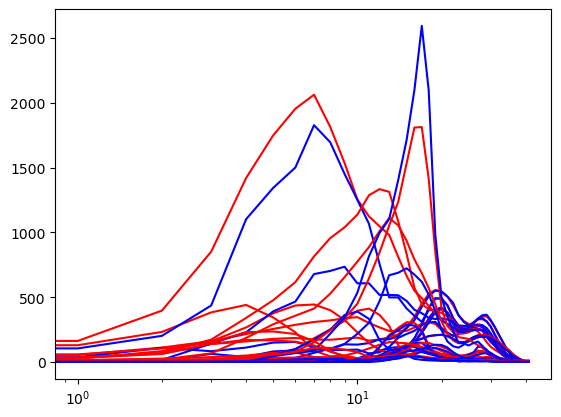

In [164]:
# Plot daily mean distribution
ii = np.arange(0, len(df_daily_2010_2020_mean), 1)

jj = np.arange(7,25,1)

fig, ax = plt.subplots()

for i in jj:
    df_tmp_mean = df_daily_2010_2020_mean.iloc[i, 3:-1].to_frame() # Omit last column with -1 as that is flags
    
    ax.plot(df_tmp_mean.index, df_tmp_mean.values,'r')
    ax.set_xscale('log')
    
    df_tmp_median = df_daily_2010_2020_median.iloc[i,3:-1].to_frame()
    ax.plot(df_tmp_median.index, df_tmp_median.values,'b')
    ax.set_xscale('log')
    
    

## Calculate the bin widths and $N_{tot}$ 

In [165]:
# Check to see that all intervals are equally spaced on a log scale
# np.diff(np.log10(diameters))

In [166]:
# Calculate the bin widths from geometric mean diameters and the total particle number concentration for each year

def calcNtot(diameters, df):
    # Create array to store upper bin boudaries
    upperBoundaries = np.empty(0)
    diameter_list = list(diameters)

    # Create array to store the number concentration in each bin
    dNs = np.empty(0)
    upperLimits = []

    for Dp in range(len(diameter_list)-1):

        # Calulate the upper bin from the geo mean of the midpoint diamters as they are equally spaced on a log scale
        upperLimits.append(np.sqrt( diameter_list[Dp] * diameter_list[Dp+1] ) )

    upperLimits = np.array(upperLimits)

    # Calulate the endpoints, ie the first lower limit and the last upper limit
    firstLimit = diameter_list[0]**2 / upperLimits[0] # This is actually the first lower limit, but its needed for the first binwidth
    lastLimit = diameter_list[-1]**2 / upperLimits[-1]

    upperBoundaries = np.insert(upperLimits, 0, firstLimit) 
    upperBoundaries = np.append(upperBoundaries, lastLimit)

    # Calculate dlogDp from the boundaries
    dlogDp = np.log10(upperBoundaries[1:]) - np.log10(upperBoundaries[:-1])

    # Calculate the particle concentration in each bin (dN) by multiplying dNdlogD with dlogD

    lenDiam = len(diameters)
    idx = len(GMDs)-lenDiam+3

    dNdlogDp = df.iloc[:,idx:-1]
    dNs = dNdlogDp*(dlogDp)
    ntotCalc = dNs.sum(axis=1)    

    df_ntotCalc = df.copy(deep = True)
    df_ntotCalc['NtotCalc'] = ntotCalc
    return df_ntotCalc

In [167]:
df_daily_2010_2020_median_ntotCalc = calcNtot(diameters, df_daily_2010_2020_median)
df_2010_2020_ntotCalc = calcNtot(diameters, df_2010_2020) # 30 min res
df_hourly_2010_2020_mean_ntotCalc = calcNtot(diameters, df_hourly_2010_2020_mean) # 30 min res

In [168]:
df_daily_2010_2020_median_ntotCalc.head(20)

,UFCPC,CPC3010,Ntot,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946,flag,NtotCalc
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03,0.0,182.125050,208.743710,2.807274e-29,2.805087e-29,2.802623e-29,2.799847e-29,2.796717e-29,2.793188e-29,2.789083e-29,...,1.595947e+01,1.140810e+01,6.404960e+00,3.215610e+00,6.580380e-02,3.644812e-02,NaN,NaN,0.0,195.422265
2010-08-08,0.0,208.549030,216.002220,2.803765e-29,2.801642e-29,2.799177e-29,2.796336e-29,2.793333e-29,2.789739e-29,2.785956e-29,...,2.583533e-01,3.454788e-01,7.831442e-01,2.956088e-01,1.836670e-02,2.100116e-29,NaN,NaN,0.0,197.317230
2010-08-09,0.0,154.734860,161.003870,2.806636e-29,2.804662e-29,2.802281e-29,2.801081e-29,8.042767e-02,1.139879e+01,1.247090e+01,...,2.046894e+00,1.640962e+00,1.104209e+00,6.720334e-01,3.448541e-01,3.823051e-01,NaN,NaN,0.0,129.073125
2010-08-10,0.0,134.719790,131.968835,2.810195e-29,2.808443e-29,2.512165e+00,1.344979e+00,9.600177e-01,3.076694e+01,4.277998e+01,...,1.163181e+00,2.004981e+00,1.831223e+00,1.312853e+00,6.538213e-01,8.970167e-01,NaN,NaN,0.0,109.282715
2010-08-11,0.0,238.900390,235.042670,2.816689e-29,2.814186e-29,2.812867e-29,2.813508e-29,1.201330e+00,4.388591e+01,7.954211e+01,...,2.129925e+00,2.208846e+00,1.974385e+00,1.572773e+00,1.200883e+00,9.980769e-01,NaN,NaN,0.0,209.785219
2010-08-12,0.0,217.511540,210.367135,2.809073e-29,2.811712e-29,2.809459e-29,2.810912e-29,2.988597e-01,2.759165e+01,3.907844e+01,...,3.029406e+00,2.734418e+00,2.293894e+00,1.758534e+00,1.196882e+00,1.270764e+00,NaN,NaN,0.0,178.575169
2010-08-13,0.0,345.619480,365.804310,2.804068e-29,2.803278e-29,2.806286e-29,9.656931e-01,2.395757e-01,2.280036e+01,3.302152e+01,...,2.013338e+00,2.162721e+00,1.652657e+00,1.387767e+00,7.904804e-01,1.037931e+00,NaN,NaN,0.0,347.025333
2010-08-17,0.0,73.230619,90.965196,2.798339e-29,2.796429e-29,2.793905e-29,2.791786e-29,2.792821e-29,2.788836e-29,9.372879e-01,...,2.347158e-29,2.291268e-29,2.239401e-29,2.190885e-29,2.146085e-29,2.103895e-29,NaN,NaN,0.0,44.688033
2010-08-18,0.0,253.924260,274.264120,2.818039e-29,3.566908e+01,1.086134e+02,8.241685e+01,1.104258e+02,1.488785e+02,1.534663e+02,...,2.435447e+01,1.159827e+01,6.361371e+00,3.276498e+00,1.181661e+00,8.864701e-01,NaN,NaN,0.0,288.351084


In [169]:
cols = df_daily_2010_2020_median.columns[3:-1]

In [170]:
diameter_list = list(diameters) 
df_daily_2010_2020_median[cols]

,5.012,5.623,6.31,7.079,7.943,8.913,10.0,11.22,12.589,14.125,...,251.189,281.838,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03,2.807274e-29,2.805087e-29,2.802623e-29,2.799847e-29,2.796717e-29,2.793188e-29,2.789083e-29,2.784506e-29,2.779898e-29,2.528172,...,36.805352,25.441111,15.959473,11.408104,6.404960,3.215610,6.580380e-02,3.644812e-02,NaN,NaN
2010-08-08,2.803765e-29,2.801642e-29,2.799177e-29,2.796336e-29,2.793333e-29,2.789739e-29,2.785956e-29,2.781377e-29,1.980118e+01,95.843733,...,1.347548,0.582094,0.258353,0.345479,0.783144,0.295609,1.836670e-02,2.100116e-29,NaN,NaN
2010-08-09,2.806636e-29,2.804662e-29,2.802281e-29,2.801081e-29,8.042767e-02,1.139879e+01,1.247090e+01,2.386696e+01,5.317039e+01,44.253335,...,6.824198,4.120078,2.046894,1.640962,1.104209,0.672033,3.448541e-01,3.823051e-01,NaN,NaN
2010-08-10,2.810195e-29,2.808443e-29,2.512165e+00,1.344979e+00,9.600177e-01,3.076694e+01,4.277998e+01,6.963213e+01,1.180271e+02,115.314160,...,2.201041,1.821533,1.163181,2.004981,1.831223,1.312853,6.538213e-01,8.970167e-01,NaN,NaN
2010-08-11,2.816689e-29,2.814186e-29,2.812867e-29,2.813508e-29,1.201330e+00,4.388591e+01,7.954211e+01,1.319526e+02,2.299151e+02,359.763670,...,3.949737,3.182375,2.129925,2.208846,1.974385,1.572773,1.200883e+00,9.980769e-01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,4.856011e-29,4.852284e-29,4.849348e-29,4.847406e-29,4.842079e-29,1.124949e-01,4.242500e+00,4.548924e+00,6.194749e+00,7.793845,...,13.867514,12.961275,10.035624,7.545087,4.860186,6.319750,5.246771e+00,4.236436e+00,5.858947e-01,1.829243e+00
2020-12-28,NaN,4.883492e-29,4.898032e-29,4.886053e-29,4.880367e-29,4.892914e-29,2.828007e+00,4.719816e+00,8.951490e+00,12.309525,...,48.724140,30.998753,26.608241,20.886540,11.484529,7.620646,6.249617e+00,5.127825e+00,2.445025e+00,1.705581e+00
2020-12-29,NaN,4.924687e-29,4.921681e-29,4.920744e-29,4.915452e-29,3.734622e-01,2.861616e+00,4.430043e+00,8.259293e+00,11.333296,...,18.791206,13.295481,8.799040,5.236407,0.004128,0.425705,1.802560e-29,1.766702e-29,1.734943e-29,1.705079e-29


In [171]:
# Check that boundries are correct

# ys = [0,10]

# fig, ax = plt.subplots()
# for i in range(len(diameters)):
#     ls = [diameters[i], diameters[i]]
#     ax.plot(ls,ys,'r:')
#     ax.set_xscale('log')
    
# for i in range(len(upperBoundaries)):
#     ls2 = [upperBoundaries[i],upperBoundaries[i]]
#     ax.plot(ls2,ys,'b')
    


In [172]:
# ls = [diameters[i], diameters[i]]
# print(ls)

### N_tot from CPC vs calclated N_tot

R-squared: 0.999363


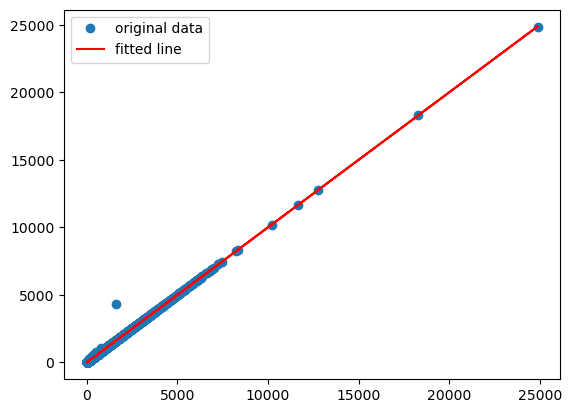

0.0445901316076629
1.0004705430431775


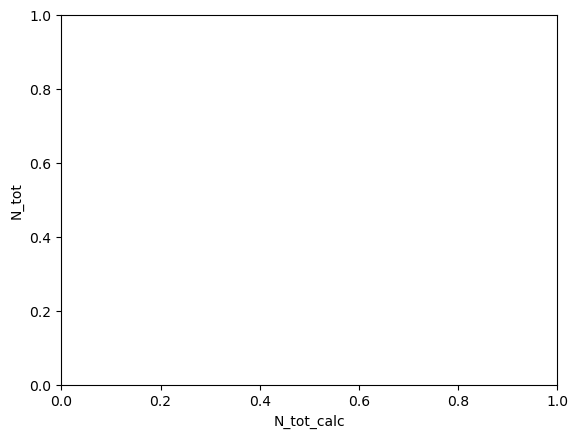

In [173]:
varx = df_hourly_2010_2020_mean_ntotCalc['NtotCalc'].values
vary = df_hourly_2010_2020_mean_ntotCalc['Ntot'].values

mask = ~np.isnan(varx) & ~np.isnan(vary)
res = sc.stats.linregress(varx[mask], vary[mask])

print(f"R-squared: {res.rvalue**2:.6f}")

plt.plot(varx,
         vary,
         'o', label='original data')
plt.plot(varx,
         res.intercept + res.slope*varx,
         'r-', label='fitted line')
plt.legend()
plt.show()    
plt.ylabel('N_tot')
plt.xlabel('N_tot_calc')
print(res.intercept)
print(res.slope)

### Compare $N_{D_P <x}/N_{tot}$ and UFCPC/CPC

In [174]:
# Compare the area up to x nm with total area 
# Vary the threshold diameter x

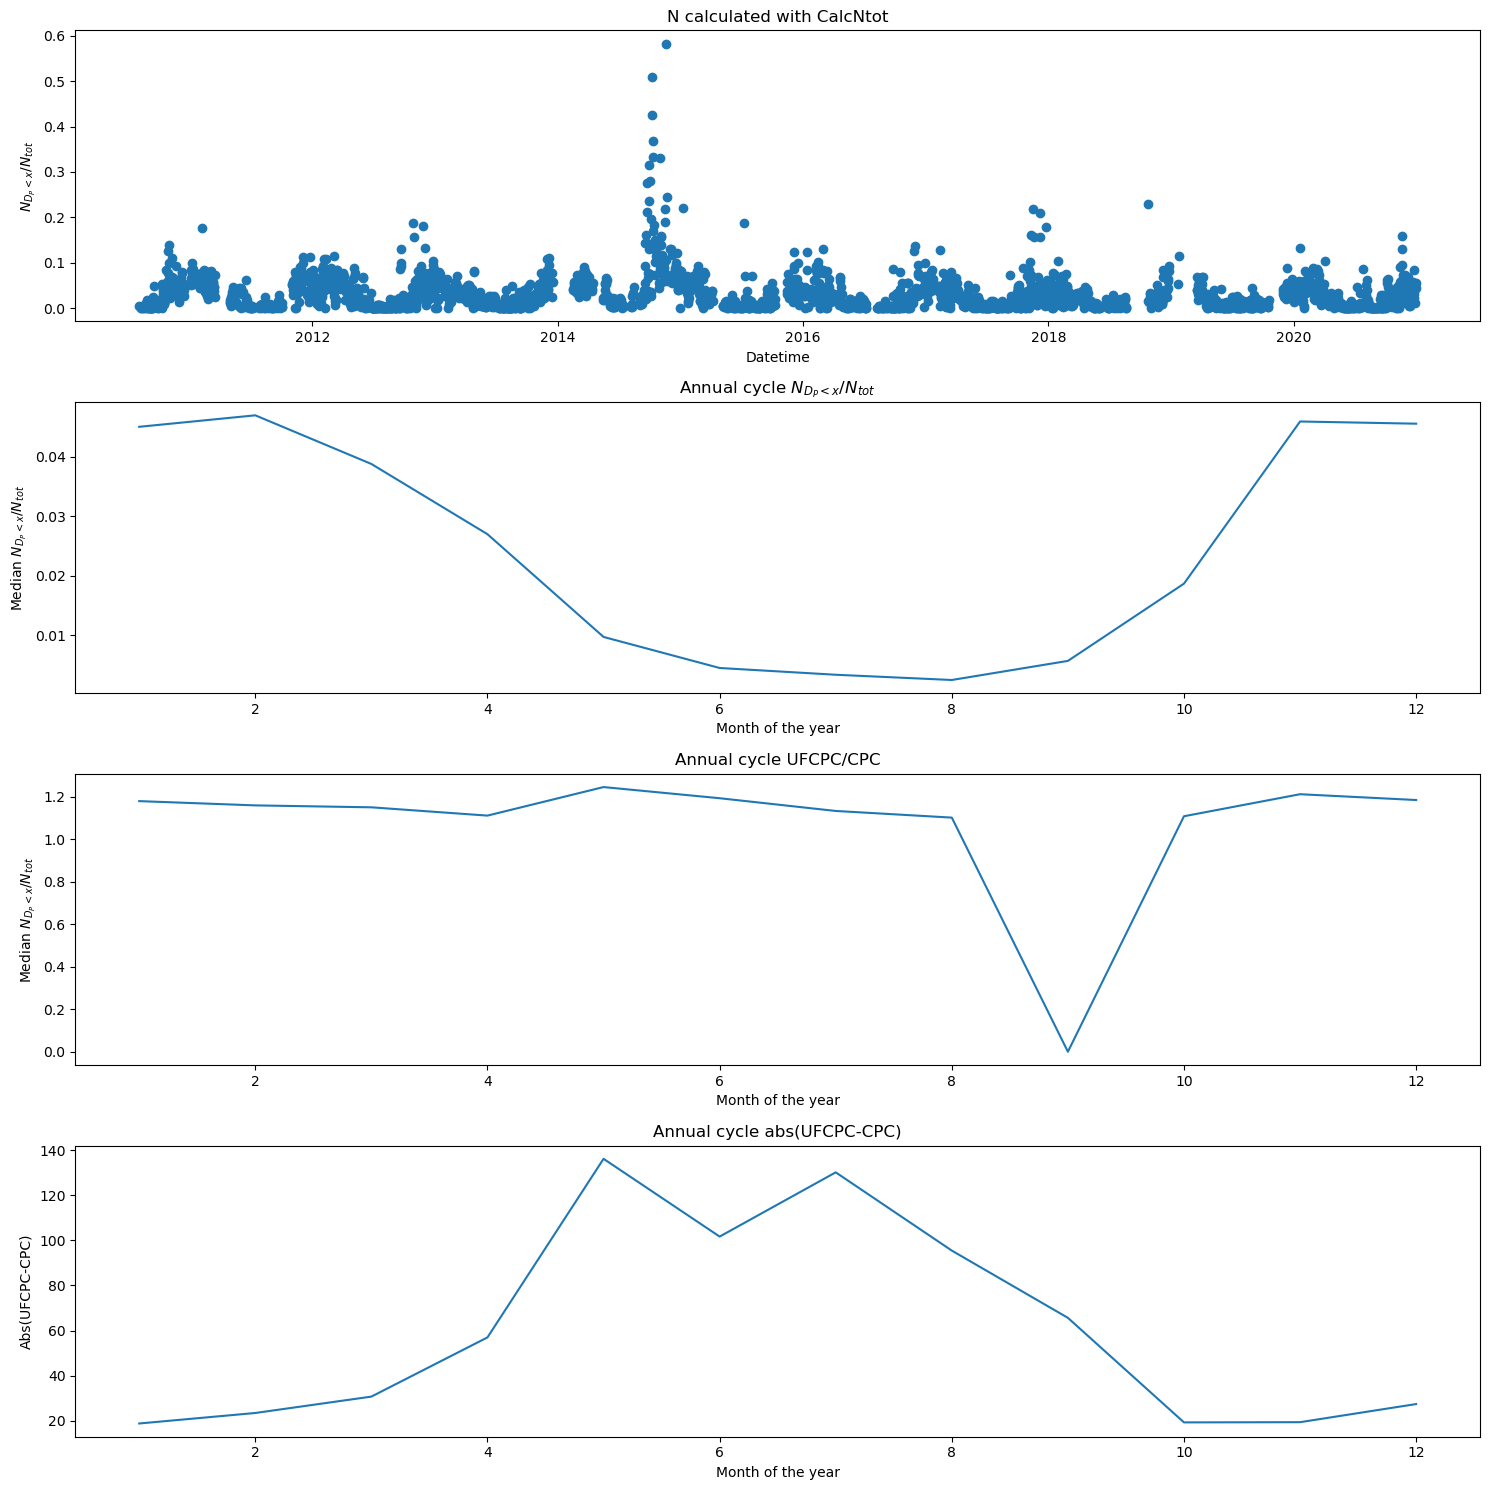

In [175]:
threshold = 10

bin_cols = get_bins(bin_col_names_2010_2020)
#print(bin_cols)
bin_cols = [float(x) for x in bin_cols]
bin_cols = [x for x in bin_cols if x < threshold]
#print(bin_cols)

# df changes
df_daily_2010_2020_median_copy = df_daily_2010_2020_median.copy(deep = True)
df_tmp = calcNtot(diameters[:len(bin_cols)+1], df_daily_2010_2020_median_copy)

# Plot Nx/Ntot
NxNtot = df_tmp['NtotCalc'].values/df_tmp['Ntot'].values

fig, axs = plt.subplots(4,figsize=(15, 15))

axs[0].plot(df_tmp.index,NxNtot,'o')
axs[0].set_xlabel('Datetime')
axs[0].set_ylabel('$N_{D_P < x}/N_{tot}$')
axs[0].set_title('N calculated with CalcNtot')

df_tmp['NxNtot'] = df_tmp['NtotCalc']/df_tmp['Ntot']
df_annual_cycle = df_tmp['NxNtot'].groupby(df_tmp.index.month).median()

axs[1].plot(df_annual_cycle.index, df_annual_cycle.values)
axs[1].set_xlabel('Month of the year')
axs[1].set_ylabel('Median $N_{D_P < x}/N_{tot}$')
axs[1].set_title('Annual cycle $N_{D_P < x}/N_{tot}$ ')

df_tmp['ratio_CPCs'] = df_tmp['UFCPC']/df_tmp['CPC3010']
df_annual_cycle_CPC = df_tmp['ratio_CPCs'].groupby(df_tmp.index.month).median()

axs[2].plot(df_annual_cycle_CPC.index, df_annual_cycle_CPC.values)
axs[2].set_xlabel('Month of the year')
axs[2].set_ylabel('Median $N_{D_P < x}/N_{tot}$')
axs[2].set_title('Annual cycle UFCPC/CPC')

# Diffs are so small so ratio is bad, abs diff is better
absDiffCPCs = np.absolute(df_tmp['UFCPC'].values - df_tmp['CPC3010'].values)
df_tmp['AbsDiffCPCs'] = absDiffCPCs
df_annual_cycle_abs = df_tmp['AbsDiffCPCs'].groupby(df_tmp.index.month).median()

axs[3].plot(df_annual_cycle_abs.index, df_annual_cycle_abs.values)
axs[3].set_xlabel('Month of the year')
axs[3].set_ylabel('Abs(UFCPC-CPC)')
axs[3].set_title('Annual cycle abs(UFCPC-CPC)')

plt.tight_layout()

### Plot daily comparison of $N_{D_P <x}/N_{tot}$ and UFCPC/CPC

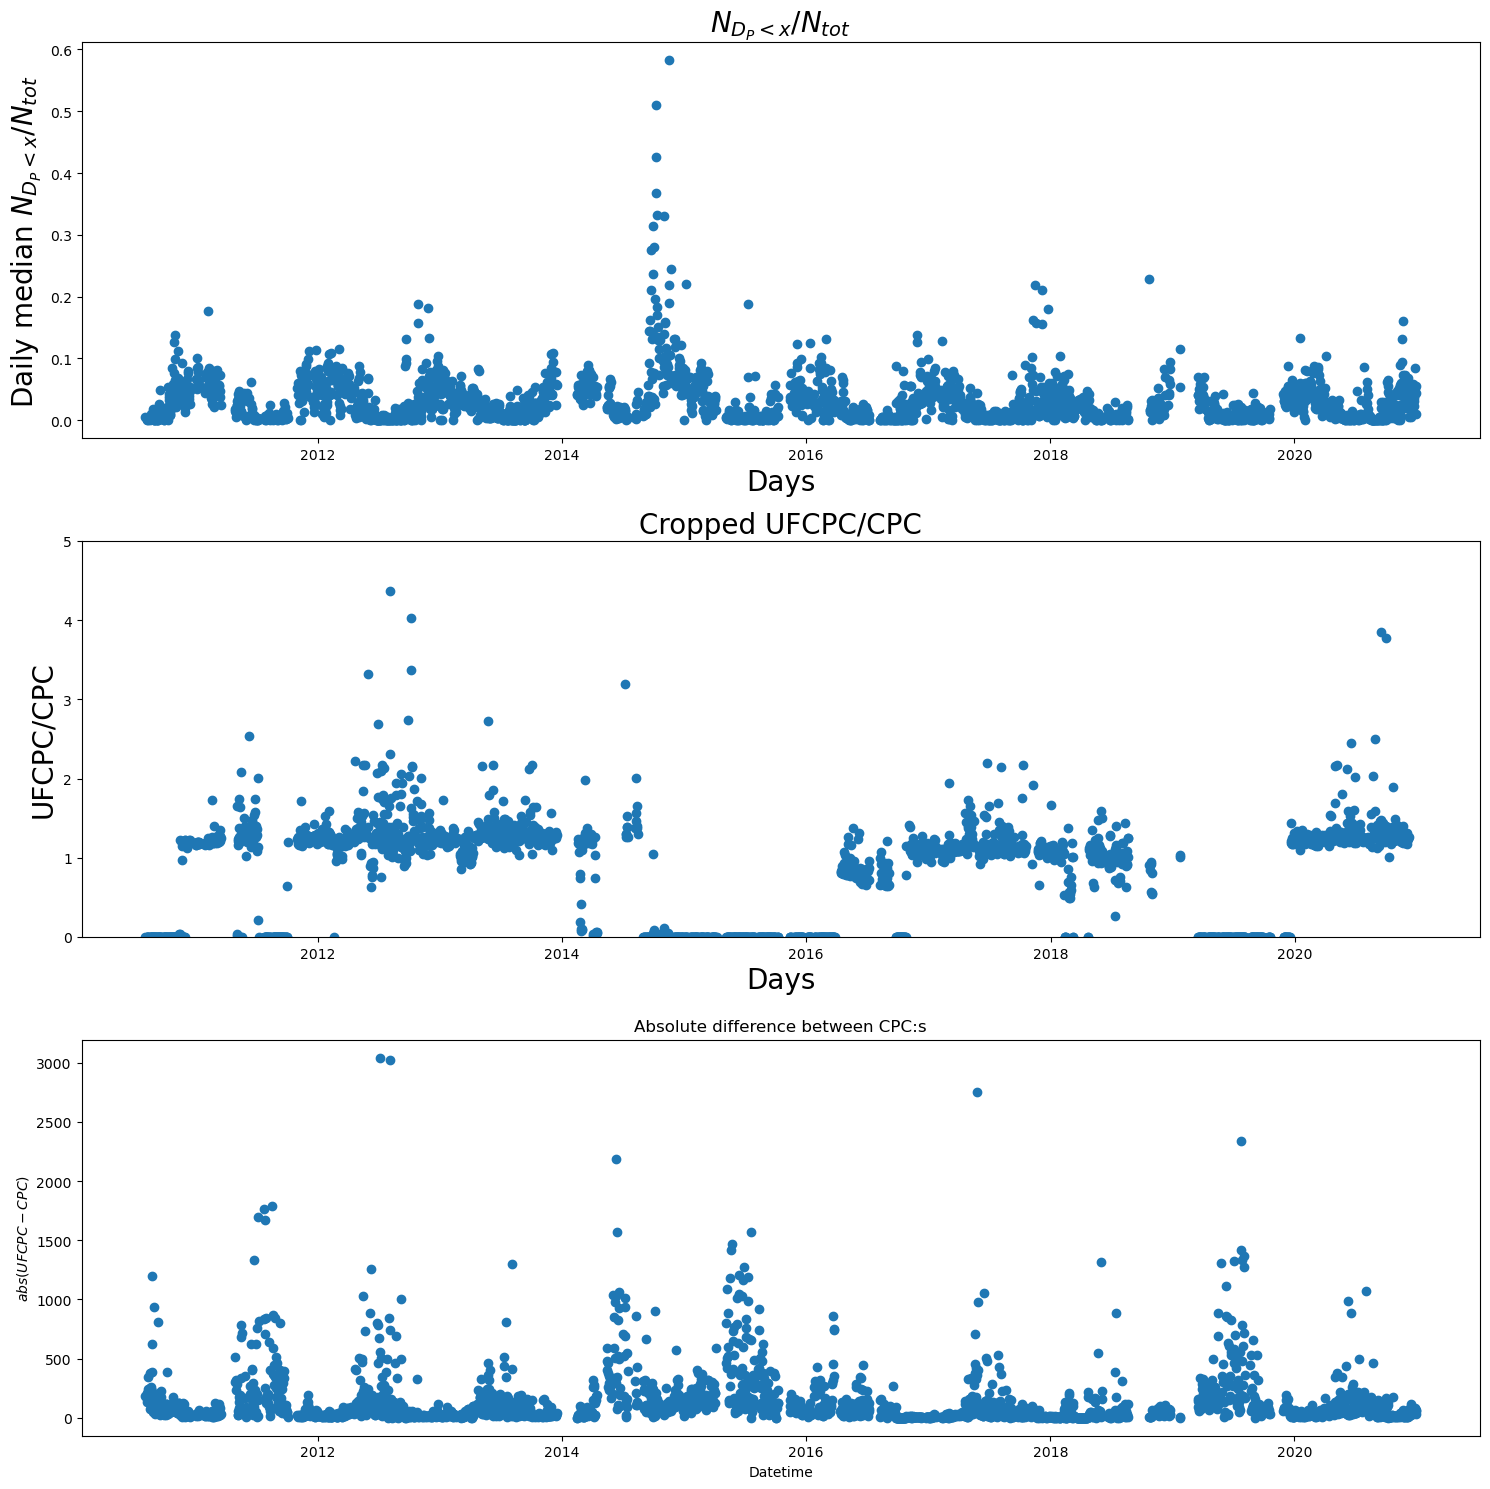

In [176]:
# Plot Nx/Ntot

fig, axs = plt.subplots(3, figsize=(15, 15))

axs[0].plot(df_tmp.index,df_tmp['NxNtot'].values,'o')
axs[0].set_xlabel('Days',fontsize=20)
axs[0].set_ylabel('Daily median $N_{D_P < x}/N_{tot}$',fontsize=20)
axs[0].set_title('$N_{D_P < x}/N_{tot}$',fontsize=20)

df_tmp['ratio_CPCs'] = df_tmp['UFCPC']/df_tmp['CPC3010']
df_annual_cycle_CPC = df_tmp['ratio_CPCs'].groupby(df_tmp.index.month).median()

axs[1].plot(df_tmp.index, df_tmp['ratio_CPCs'].values,'o')
axs[1].set_xlabel('Days',fontsize=20)
axs[1].set_ylabel('UFCPC/CPC',fontsize=20)
axs[1].set_title('Cropped UFCPC/CPC',fontsize=20)
axs[1].set_ylim([0, 5])

axs[2].plot(df_tmp.index,absDiffCPCs,'o')
axs[2].set_xlabel('Datetime')
axs[2].set_ylabel('$abs(UF CPC - CPC)$')
axs[2].set_title('Absolute difference between CPC:s')


plt.tight_layout()

## Clustering 

In [177]:
from sklearn import metrics
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import KMeans

#### Function to normalize the size distributions before clustering

In [178]:
def create_normalised_df(dataFrame, start_size_bin_col='5.012', end_size_bin_col='707.946'):
    df = dataFrame.copy()
    
    n_vars = ['norm'+str(df.loc[:, start_size_bin_col:end_size_bin_col].columns.tolist()[i]) for i in range(0, df.loc[:, start_size_bin_col:end_size_bin_col].shape[1])]
    print(n_vars)
    #divide by maximum
    df[n_vars] = df.loc[:, start_size_bin_col:end_size_bin_col].div(df.loc[:, start_size_bin_col:end_size_bin_col].max(axis=1), axis=0)
    
    df = df.loc[df.loc[:,start_size_bin_col:end_size_bin_col].dropna().index]
    
    Datetime_index = df.index    
    df.reset_index(drop=True, inplace=True)
    #print("Size of df after removing np.nan: "+str(len(df)))
    
    start_size_normbin_col = 'norm'+str(start_size_bin_col)
    end_size_normbin_col = 'norm'+str(end_size_bin_col)    
    
    df_norm = df.loc[:, start_size_normbin_col:end_size_normbin_col].copy()
    df_norm.index = Datetime_index
    df.index = Datetime_index
    
    print("Shape of df_norm: "+str(df_norm.shape))
    print("Shape of df: "+str(df.shape))
    return df, df_norm

#### Function to perform clustering of normalized size distributions

In [179]:
def perform_clustering(df_normarlised, n_clusters):
    kmeans = KMeans(init="k-means++", n_clusters=n_clusters).fit(df_normarlised) #Compute k-means clustering.
    labels = kmeans.labels_
    centres = kmeans.cluster_centers_
    df_normarlised['clusters'] = kmeans.predict(df_normarlised) #Predict the closest cluster each sample in X belongs to.
    df_normalized_copy = df_normarlised.copy()
    print(df_normalized_copy['clusters'].unique())
    df_normalized_copy['clusters'] = df_normalized_copy['clusters']+1
    print(df_normalized_copy['clusters'].unique())
    return df_normalized_copy

In [180]:
# Calling function to normalize size distributions 

df1, df_daily_2010_2020_median_norm = create_normalised_df(df_daily_2010_2020_median)
df2, df_daily_2010_2020_mean_norm = create_normalised_df(df_daily_2010_2020_mean)
df3, df_daily_2010_2020_1h_mean_norm = create_normalised_df(df_hourly_2010_2020_mean)


['norm5.012', 'norm5.623', 'norm6.31', 'norm7.079', 'norm7.943', 'norm8.913', 'norm10.0', 'norm11.22', 'norm12.589', 'norm14.125', 'norm15.849', 'norm17.783', 'norm19.953', 'norm22.387', 'norm25.119', 'norm28.184', 'norm31.623', 'norm35.481', 'norm39.811', 'norm44.668', 'norm50.119', 'norm56.234', 'norm63.096', 'norm70.795', 'norm79.433', 'norm89.125', 'norm100.0', 'norm112.202', 'norm125.893', 'norm141.254', 'norm158.489', 'norm177.828', 'norm199.526', 'norm223.872', 'norm251.189', 'norm281.838', 'norm316.228', 'norm354.813', 'norm398.107', 'norm446.684', 'norm501.187', 'norm562.341', 'norm630.957', 'norm707.946']
Shape of df_norm: (1491, 44)
Shape of df: (1491, 92)
['norm5.012', 'norm5.623', 'norm6.31', 'norm7.079', 'norm7.943', 'norm8.913', 'norm10.0', 'norm11.22', 'norm12.589', 'norm14.125', 'norm15.849', 'norm17.783', 'norm19.953', 'norm22.387', 'norm25.119', 'norm28.184', 'norm31.623', 'norm35.481', 'norm39.811', 'norm44.668', 'norm50.119', 'norm56.234', 'norm63.096', 'norm70.795

In [181]:
#df_hourly_2010_2020_mean.head()

#### Check that are normalized (only snapshots)

In [182]:
# jj = np.arange(7,25,1)

# fig, ax = plt.subplots()

# for i in jj:
#     df_tmp_norm = df_daily_2010_2020_median_norm.iloc[i,:].to_frame() # Omit last column with -1 as that is flags
    
#     ax.plot(diameters*10**9, df_tmp_norm.values,'r')
#     ax.set_xscale('log')


#### Cluster daily median and mean data and 1h hour mean

##### Define the number of clusters 

In [183]:
n_clusters = 5

In [184]:
df_norm_clustered_median = perform_clustering(df_daily_2010_2020_median_norm, n_clusters)
df_norm_clustered_mean = perform_clustering(df_daily_2010_2020_mean_norm, n_clusters)

# 1 hour data needs special treatment:
# Drop the 1st and two last bins before clustering
df_hourly_norm_dropped = df_daily_2010_2020_1h_mean_norm.copy()
df_hourly_norm_dropped = df_hourly_norm_dropped.drop \
                         (columns=['norm5.012','norm630.957','norm707.946'])

df_norm_clustered_1h_mean = perform_clustering(df_hourly_norm_dropped, n_clusters)
print(df_norm_clustered_1h_mean['clusters'].unique())

[4 1 0 3 2]
[5 2 1 4 3]
[1 3 0 2 4]
[2 4 1 3 5]
[3 2 0 4 1]
[4 3 1 5 2]
[4 3 1 5 2]


In [185]:
#df_hourly_norm_dropped

#### Cluster 1h-mean data (not normalized)

In [186]:
# First drop the columns that should not be clustered
df_hourly_2010_2020_mean_cleaned = df_hourly_2010_2020_mean.copy()
print(df_hourly_2010_2020_mean.shape)
df_hourly_2010_2020_mean_cleaned = df_hourly_2010_2020_mean_cleaned.drop \
                                   (columns=['UFCPC','5.012','630.957','707.946','CPC3010','Ntot','flag'])

print(df_hourly_2010_2020_mean_cleaned.shape)

def countNans(df):
    no_of_rows, no_of_cols = df.shape
    list_of_nans = []
    for i in range(no_of_cols):
        tmp = df.iloc[:,i].values
        no_of_nans = tmp[np.isnan(tmp)]
        list_of_nans.append( len(no_of_nans) )
    return list_of_nans
        
list_of_nans = countNans(df_hourly_2010_2020_mean_cleaned)  
#print(list_of_nans)
# Conclusion: I drop the first size bin as it contains the majority of the nans
        
        

(60439, 48)
(60439, 41)


In [187]:
# To perform clustering of non-nromalized distributions NaNs must be dropped (done automatically in normalization)
print('Shape before dropping Nans:',df_hourly_2010_2020_mean_cleaned.shape)

df_hourly_2010_2020_mean_cleaned = df_hourly_2010_2020_mean_cleaned \
                                    .loc[df_hourly_2010_2020_mean_cleaned.loc[:,:].dropna().index]
print('Shape after dropping Nans:',df_hourly_2010_2020_mean_cleaned.shape)

df_clustered_1h_mean = perform_clustering(df_hourly_2010_2020_mean_cleaned, n_clusters)


Shape before dropping Nans: (60439, 41)
Shape after dropping Nans: (60439, 41)
[0 4 1 3 2]
[1 5 2 4 3]


#### Cluster 1h-mean data (normalized distributions)

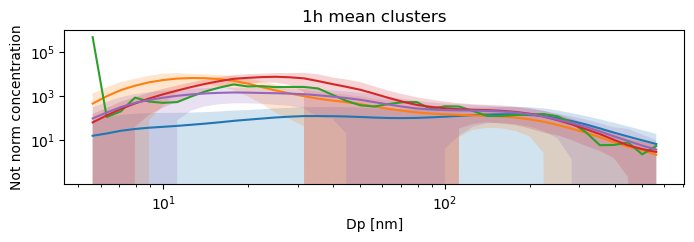

In [188]:
# Look at 1h mean clusters (from excluding the first bin)

# I have dropped two last columns + first (bins that is)
df_mean_1h_clusters = df_clustered_1h_mean.groupby('clusters').mean()
df_std_1h_clusters  = df_clustered_1h_mean.groupby('clusters').std()

fig, ax = plt.subplots(figsize=(8,2))

for i in range(n_clusters):
    ax.plot(diameters[1:-2]*10**9, df_mean_1h_clusters.iloc[i,:].values, '-')
    
    ax.fill_between(diameters[1:-2]*10**9, df_mean_1h_clusters.iloc[i,:].values+df_std_1h_clusters.iloc[i,:].values,                    
                        df_mean_1h_clusters.iloc[i,:].values-df_std_1h_clusters.iloc[i,:].values, alpha=0.2)
    
    #ax.plot(diameters*10**9, df_median_clusters.iloc[i,:].values, 'k-')
    #ax.set_xticks(bin_cols[::5])
    ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.set_ylim(0,1.1)
plt.xlabel('Dp [nm]')
plt.title('1h mean clusters')
plt.ylabel('Not norm concentration')
plt.show()

In [189]:
df_mean_1h_clusters.head()

,5.623,6.31,7.079,7.943,8.913,10.0,11.22,12.589,14.125,15.849,...,199.526,223.872,251.189,281.838,316.228,354.813,398.107,446.684,501.187,562.341
clusters,,,,,,,,,,,,,,,,,,,,,
1,16.276309,20.576287,27.276199,32.914892,37.455737,41.155167,45.442932,51.030606,57.529012,65.805908,...,143.259778,126.894190,101.078690,75.293486,52.857771,34.911223,22.505260,14.963042,10.113037,6.882993
2,462.004431,987.264712,1881.610598,2955.808487,4213.905785,5349.269123,6221.548461,6583.895865,6473.980989,5919.097921,...,89.947506,70.280095,49.637018,33.973184,22.172705,13.996756,8.259617,5.214298,3.670733,2.266226
3,464628.720742,113.782961,205.915515,862.264425,570.142975,499.828810,539.213690,968.447780,1635.557250,2440.375550,...,149.240235,155.404095,122.589910,63.504685,23.509003,6.086729,6.240429,8.109983,2.354116,5.620107
4,65.177289,135.031864,265.144643,466.462355,780.953204,1214.156240,1792.051504,2590.188174,3602.033413,4783.536262,...,161.625497,119.682391,82.578106,53.181002,32.219969,19.324801,10.621293,5.994955,4.054997,3.026656
5,98.493626,182.071200,320.648838,493.512626,672.786648,853.415374,1038.467110,1201.940047,1326.852462,1414.716793,...,154.155569,121.018474,88.086316,61.720587,41.002270,25.267820,15.228469,9.456728,5.872063,3.859162


In [190]:
len(diameters[1:-2]*10**9)
print(df_mean_1h_clusters.shape)

(5, 41)


In [191]:
df_hourly_2010_2020_mean.iloc[:,1].values

array([1.92743870e+02, 1.82486285e+02, 1.41769720e+02, ...,
       2.47061390e-04, 1.23564450e-04, 2.46948720e-04])

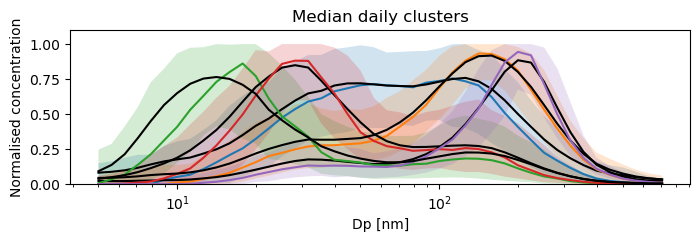

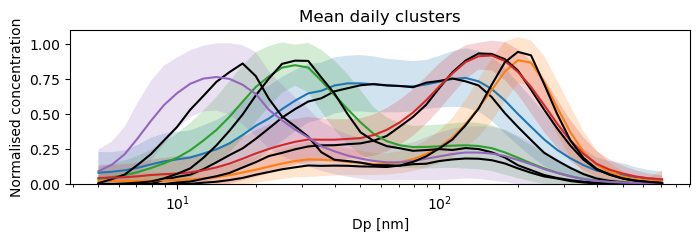

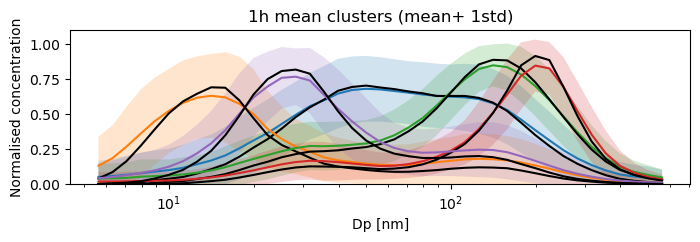

1
2
3
4
5


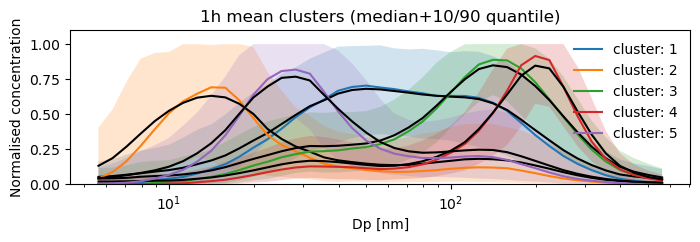

In [192]:
# Check to see how median clusters look like---------------------------------------


df_median_clusters = df_norm_clustered_median.groupby('clusters').median()
df_quantile10_clusters = df_norm_clustered_median.groupby('clusters').quantile(.1)
df_quantile90_clusters = df_norm_clustered_median.groupby('clusters').quantile(.9)

df_mean_clusters = df_norm_clustered_mean.groupby('clusters').mean()
df_std_clusters = df_norm_clustered_mean.groupby('clusters').std()

df_norm_clustered_1h_mean_median = df_norm_clustered_1h_mean.groupby('clusters').median()
df_norm_clustered_1h_10q = df_norm_clustered_1h_mean.groupby('clusters').quantile(.1)
df_norm_clustered_1h_90q = df_norm_clustered_1h_mean.groupby('clusters').quantile(.9)

fig, ax = plt.subplots(figsize=(8,2))

for i in range(n_clusters):
    ax.plot(diameters*10**9, df_median_clusters.iloc[i,:].values, '-')
    ax.plot(diameters*10**9, df_mean_clusters.iloc[i,:].values, 'k-')
    ax.fill_between(diameters*10**9, df_quantile90_clusters.iloc[i,:].values,
                        df_quantile10_clusters.iloc[i,:].values, alpha=0.2)
    #ax.set_xticks(bin_cols[::5])
    ax.set_xscale('log')
    ax.set_ylim(0,1.1)
plt.xlabel('Dp [nm]')
plt.title('Median daily clusters')
plt.ylabel('Normalised concentration')
plt.show()

# Check to see how mean daily clusters look like---------------------------------------


fig, ax = plt.subplots(figsize=(8,2))

for i in range(n_clusters):
    ax.plot(diameters*10**9, df_mean_clusters.iloc[i,:].values, '-')
    ax.fill_between(diameters*10**9, df_mean_clusters.iloc[i,:].values+df_std_clusters.iloc[i,:].values,                    
                        df_mean_clusters.iloc[i,:].values-df_std_clusters.iloc[i,:].values, alpha=0.2)
    ax.plot(diameters*10**9, df_median_clusters.iloc[i,:].values, 'k-')
    #ax.set_xticks(bin_cols[::5])
    ax.set_xscale('log')
    ax.set_ylim(0,1.1)
    
    
plt.xlabel('Dp [nm]')
plt.title('Mean daily clusters')
plt.ylabel('Normalised concentration')
plt.show()

# Check to see how 1h mean clusters look like---------------------------------------
# !!! Note that columns have been dropped !!!! -------------------------------------


df_norm_clustered_1h_mean_mean = df_norm_clustered_1h_mean.groupby('clusters').mean()
df_norm_clustered_1h_std = df_norm_clustered_1h_mean.groupby('clusters').std()

fig, ax = plt.subplots(figsize=(8,2))

for i in range(n_clusters):
    ax.plot(diameters[1:-2]*10**9, df_norm_clustered_1h_mean_mean.iloc[i,:].values, '-')
    ax.fill_between(diameters[1:-2]*10**9, 
                    df_norm_clustered_1h_mean_mean.iloc[i,:].values + df_norm_clustered_1h_std.iloc[i,:].values,                    
                    df_norm_clustered_1h_mean_mean.iloc[i,:].values - df_norm_clustered_1h_std.iloc[i,:].values, alpha=0.2)
    
    # Plot the median to see similarity
    ax.plot(diameters[1:-2]*10**9, df_norm_clustered_1h_mean_median.iloc[i,:].values, 'k-')
    #ax.set_xticks(bin_cols[::5])
    ax.set_xscale('log')
    ax.set_ylim(0,1.1)
    
    
plt.xlabel('Dp [nm]')
plt.title('1h mean clusters (mean+ 1std)')
plt.ylabel('Normalised concentration')
plt.show()

# Median 1h mean clusters----------------------------------------------


fig, ax = plt.subplots(figsize=(8,2))

clusters = [1,2,3,4,5]

for cluster in clusters:
    print(cluster)
    df_cluster = df_norm_clustered_1h_mean_median[df_norm_clustered_1h_mean_median.index == cluster]
    df_cluster_mean = df_norm_clustered_1h_mean_mean[df_norm_clustered_1h_mean_mean.index == cluster]
    df_cluster90 = df_norm_clustered_1h_90q[df_norm_clustered_1h_90q.index == cluster]
    df_cluster10 = df_norm_clustered_1h_10q[df_norm_clustered_1h_10q.index == cluster]
    
    ax.plot(diameters[1:-2]*10**9, df_cluster.iloc[0,:].values, '-', 
            label='cluster: '+str(cluster))
    ax.fill_between(diameters[1:-2]*10**9, 
                    df_cluster90.iloc[0,:].values,
                    df_cluster10.iloc[0,:].values,
                    alpha=0.2)
    ax.legend(frameon=False)
    
    # Plot the mean to see similarity
    ax.plot(diameters[1:-2]*10**9, df_cluster_mean.iloc[0,:].values, 'k-')
    #ax.set_xticks(bin_cols[::5])
    ax.set_xscale('log')
    ax.set_ylim(0,1.1)
    
    
plt.xlabel('Dp [nm]')
plt.title('1h mean clusters (median+10/90 quantile)')
plt.ylabel('Normalised concentration')
plt.show()

In [193]:
df_cluster.iloc[0,:].values

array([0.00136337, 0.00547861, 0.01053299, 0.02043224, 0.04014526,
       0.06621397, 0.10185357, 0.16062948, 0.23795431, 0.34859202,
       0.48867884, 0.63956018, 0.74977685, 0.80771686, 0.81816578,
       0.78884185, 0.66081142, 0.52064057, 0.40072489, 0.31116809,
       0.25347619, 0.21758092, 0.19944398, 0.18691444, 0.18648587,
       0.19004821, 0.19776161, 0.20045535, 0.19252638, 0.17329593,
       0.14290707, 0.11412009, 0.08283876, 0.05601913, 0.03714864,
       0.02479416, 0.01531915, 0.00894684, 0.00525674, 0.00283854,
       0.00143794])

In [194]:
df_norm_clustered_1h_90q

,norm5.623,norm6.31,norm7.079,norm7.943,norm8.913,norm10.0,norm11.22,norm12.589,norm14.125,norm15.849,...,norm199.526,norm223.872,norm251.189,norm281.838,norm316.228,norm354.813,norm398.107,norm446.684,norm501.187,norm562.341
clusters,,,,,,,,,,,,,,,,,,,,,
1,0.160848,0.176967,0.210679,0.239183,0.258118,0.281677,0.330575,0.387499,0.426479,0.497202,...,0.701159,0.604441,0.491139,0.383664,0.299931,0.235119,0.176691,0.148754,0.129302,0.106473
2,0.404840,0.532962,0.731862,0.896214,0.936696,0.943632,1.000000,1.000000,0.993598,1.000000,...,0.343247,0.293649,0.229986,0.173024,0.124047,0.083113,0.053408,0.035897,0.025965,0.018818
3,0.114148,0.117684,0.134180,0.158102,0.166483,0.169935,0.196820,0.215458,0.245304,0.300966,...,0.969046,0.894206,0.768055,0.610203,0.453663,0.333602,0.238504,0.185655,0.145925,0.111307
4,0.047069,0.046809,0.055056,0.062398,0.070085,0.072030,0.082250,0.104200,0.126162,0.159038,...,1.000000,1.000000,1.000000,0.838072,0.615265,0.381594,0.221162,0.140884,0.098277,0.068787
5,0.120454,0.146705,0.186559,0.235751,0.278038,0.329471,0.417176,0.510992,0.631965,0.768881,...,0.389362,0.321267,0.249226,0.184099,0.134400,0.094635,0.061051,0.043662,0.030463,0.024439


In [195]:
df_tmp.head()

,UFCPC,CPC3010,Ntot,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,446.684,501.187,562.341,630.957,707.946,flag,NtotCalc,NxNtot,ratio_CPCs,AbsDiffCPCs
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03,0.0,182.12505,208.743710,2.807274e-29,2.805087e-29,2.802623e-29,2.799847e-29,2.796717e-29,2.793188e-29,2.789083e-29,...,3.215610,0.065804,3.644812e-02,NaN,NaN,0.0,1.056546,0.005061,0.0,182.12505
2010-08-08,0.0,208.54903,216.002220,2.803765e-29,2.801642e-29,2.799177e-29,2.796336e-29,2.793333e-29,2.789739e-29,2.785956e-29,...,0.295609,0.018367,2.100116e-29,NaN,NaN,0.0,0.072130,0.000334,0.0,208.54903
2010-08-09,0.0,154.73486,161.003870,2.806636e-29,2.804662e-29,2.802281e-29,2.801081e-29,8.042767e-02,1.139879e+01,1.247090e+01,...,0.672033,0.344854,3.823051e-01,NaN,NaN,0.0,0.207218,0.001287,0.0,154.73486
2010-08-10,0.0,134.71979,131.968835,2.810195e-29,2.808443e-29,2.512165e+00,1.344979e+00,9.600177e-01,3.076694e+01,4.277998e+01,...,1.312853,0.653821,8.970167e-01,NaN,NaN,0.0,0.334995,0.002538,0.0,134.71979
2010-08-11,0.0,238.90039,235.042670,2.816689e-29,2.814186e-29,2.812867e-29,2.813508e-29,1.201330e+00,4.388591e+01,7.954211e+01,...,1.572773,1.200883,9.980769e-01,NaN,NaN,0.0,0.397748,0.001692,0.0,238.90039


### Look at trends in 1h mean data 

In [ ]:
df_dmps_for_Kei = df_hourly_2010_2020.

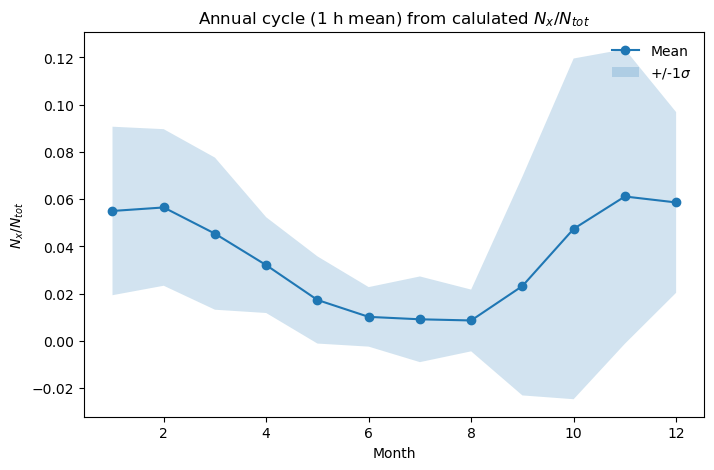

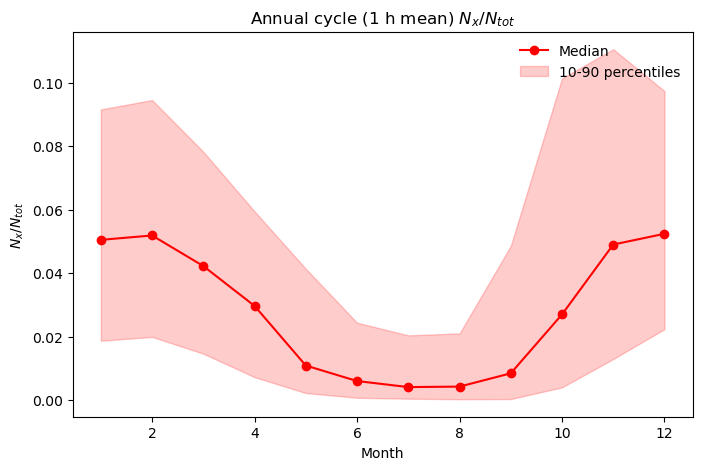

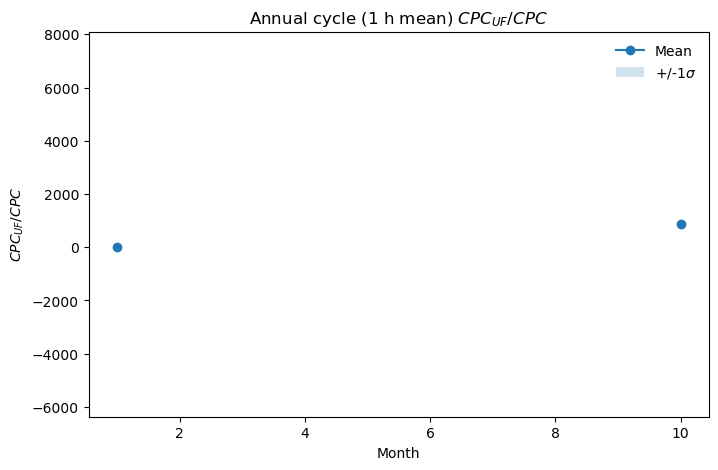

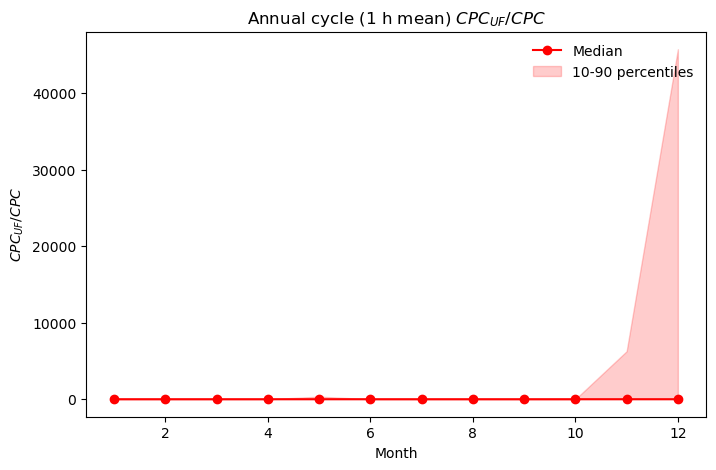

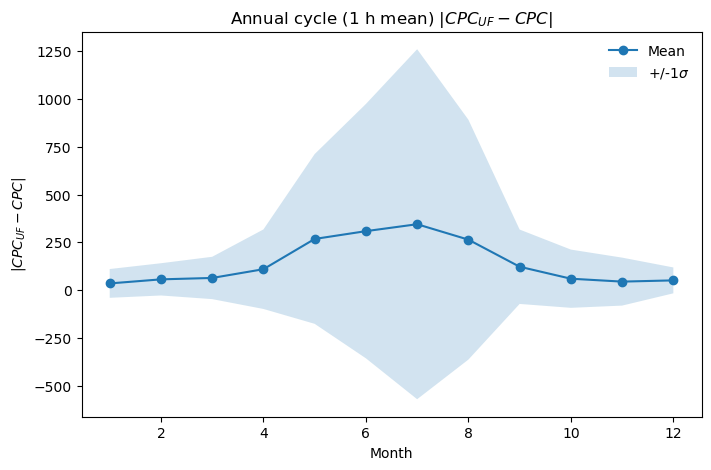

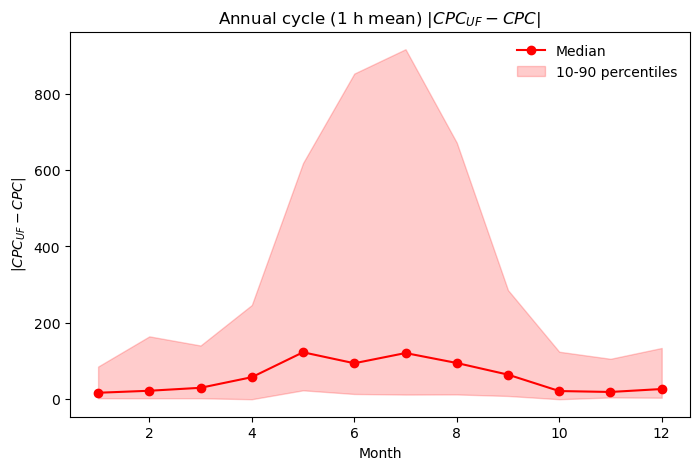

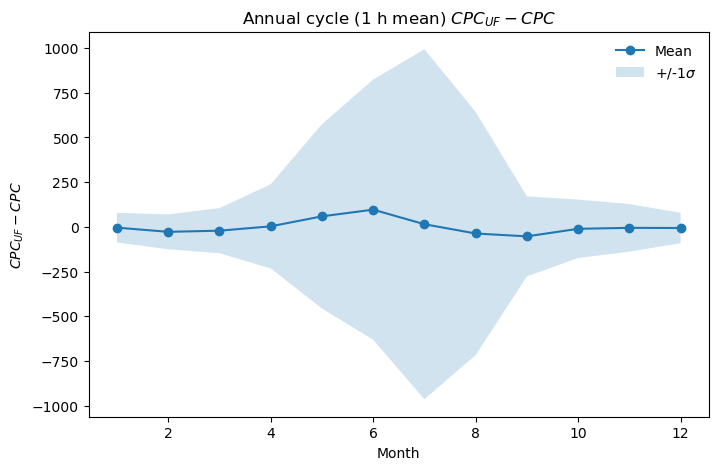

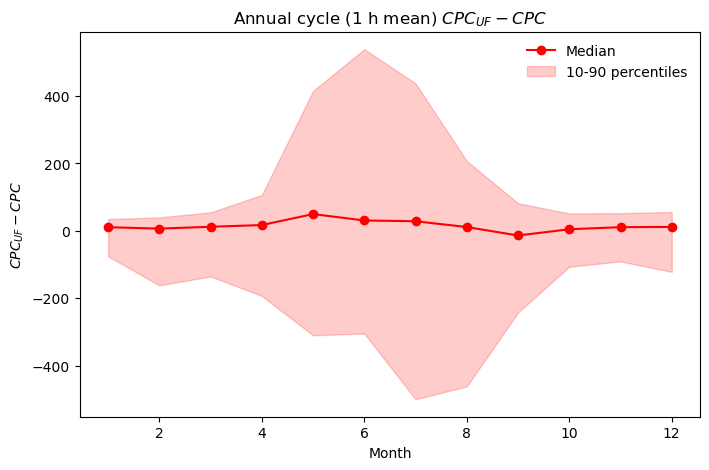

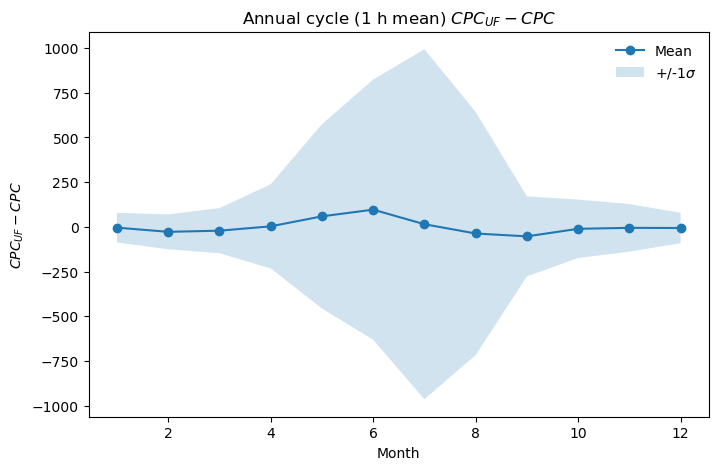

In [205]:
# Create temporary copy
df_tmp = df_hourly_2010_2020_mean.copy(deep = True)
# df_tmp = df_tmp.drop(columns=['UFCPC','CPC3010','Ntot','flag'])
# # =['UFCPC','5.012','630.957','707.946','CPC3010','Ntot','flag'])

# In temporary copy of mean data add columns: 


# Create Nx/Ntot for 1 h mean data
df_tmp = calcNtot(diameters[:len(bin_cols)+1], df_tmp)
df_tmp_nxntot = df_tmp.copy(deep = True)

df_tmp_nxntot['NxNtot'] = df_tmp_nxntot['NtotCalc']/df_tmp_nxntot['Ntot']

# Drop NaN:s
df_tmp_nxntot = df_tmp_nxntot.dropna(subset =['NxNtot'])

# Look at annual cycle for NxNtot
df_tmp_nxntot_mean = df_tmp_nxntot['NxNtot'].groupby(df_tmp_nxntot.index.month).mean()
df_tmp_nxntot_std = df_tmp_nxntot['NxNtot'].groupby(df_tmp_nxntot.index.month).std()

df_tmp_nxntot_median = df_tmp_nxntot['NxNtot'].groupby(df_tmp_nxntot.index.month).median()
df_tmp_nxntot_10q = df_tmp_nxntot['NxNtot'].groupby(df_tmp_nxntot.index.month).quantile(0.1)
df_tmp_nxntot_90q = df_tmp_nxntot['NxNtot'].groupby(df_tmp_nxntot.index.month).quantile(0.9)

# Create UF CPC/CPC ratio for 1 h mean data
df_tmp_rat =  df_tmp.copy(deep = True)
df_tmp_rat['ratio_CPCs'] = df_tmp_rat['UFCPC']/df_tmp_rat['CPC3010']

# Drop NaN:s
df_tmp_rat = df_tmp_rat.dropna(subset =['ratio_CPCs'])

df_1h_annual_cycle_rat_mean = df_tmp_rat['ratio_CPCs'].groupby(df_tmp_rat.index.month).mean()
df_1h_annual_cycle_rat_std = df_tmp_rat['ratio_CPCs'].groupby(df_tmp_rat.index.month).std()
8
df_1h_annual_cycle_rat_median = df_tmp_rat['ratio_CPCs'].groupby(df_tmp_rat.index.month).median()
df_1h_annual_cycle_rat_10q    = df_tmp_rat['ratio_CPCs'].groupby(df_tmp_rat.index.month).quantile(0.1)
df_1h_annual_cycle_rat_90q    = df_tmp_rat['ratio_CPCs'].groupby(df_tmp_rat.index.month).quantile(0.9)

# Create absolute diff Uf cpc - cpc----------------------------------------------------------

df_tmp['abs_diff'] = np.absolute(df_tmp['UFCPC']-df_tmp['CPC3010'])

df_tmp_adiff = df_tmp.copy(deep = True)

# Drop NaN's
df_tmp_adiff = df_tmp_adiff.dropna(subset =['abs_diff'])

df_1h_annual_cycle_adiff_mean = df_tmp_adiff['abs_diff'].groupby(df_tmp_adiff.index.month).mean()
df_1h_annual_cycle_adiff_std = df_tmp_adiff['abs_diff'].groupby(df_tmp_adiff.index.month).std()

df_1h_annual_cycle_adiff_median = df_tmp_adiff['abs_diff'].groupby(df_tmp_adiff.index.month).median()
df_1h_annual_cycle_adiff_10q = df_tmp_adiff['abs_diff'].groupby(df_tmp_adiff.index.month).quantile(0.1)
df_1h_annual_cycle_adiff_90q = df_tmp_adiff['abs_diff'].groupby(df_tmp_adiff.index.month).quantile(0.9)

# Create diff UFcpc and cpc----------------------------------------------------------

df_tmp['diff_cpcs'] = df_tmp['UFCPC']-df_tmp['CPC3010']

# Have to drop nans!!!!!!!

df_tmp_diff = df_tmp.copy(deep = True)
df_tmp_diff = df_tmp_diff.dropna(subset =['diff_cpcs'])

df_1h_annual_cycle_diff_mean = df_tmp_diff['diff_cpcs'].groupby(df_tmp_diff.index.month).mean()
df_1h_annual_cycle_diff_std = df_tmp_diff['diff_cpcs'].groupby(df_tmp_diff.index.month).std()

df_1h_annual_cycle_diff_median = df_tmp_diff['diff_cpcs'].groupby(df_tmp_diff.index.month).median()
df_1h_annual_cycle_diff_10q = df_tmp_diff['diff_cpcs'].groupby(df_tmp_diff.index.month).quantile(0.1)
df_1h_annual_cycle_diff_90q = df_tmp_diff['diff_cpcs'].groupby(df_tmp_diff.index.month).quantile(0.9)

#--------------------------------------------------------------------------------------------------

def makeTrendPlotsMean(dfMean, dfStd, xL, yL, tL):
    fig, axs = plt.subplots(1, figsize=(8, 5))
    axs.plot(dfMean.index, 
             dfMean.values,
             'o-', label= 'Mean')
    min_std = dfMean.values - dfStd.values
    #min_std[min_std<0]=0
    
    axs.fill_between(dfMean.index,
                dfMean.values + dfStd.values,
                min_std,
                alpha=0.2,label= '+/-1$\sigma$')
    axs.legend(frameon=False)
    axs.set_xlabel(xL)
    axs.set_ylabel(yL)
    axs.set_title(tL) 
    return fig, axs

def makeTrendPlotsMedian(dfMedian, dfUpperQ, dfLowerQ, UQ, LQ, xL, yL, tL):
    fig, axs = plt.subplots(1, figsize=(8, 5))
    axs.plot(dfMedian.index, 
             dfMedian.values,
             'ro-', label= 'Median')
    axs.fill_between(dfMedian.index,
                dfUpperQ,
                dfLowerQ,
                color ='r',alpha=0.2,label= str(LQ)+'-'+str(UQ)+' percentiles')
    axs.legend(frameon=False)
    axs.set_xlabel(xL)
    axs.set_ylabel(yL)
    axs.set_title(tL) 
    return fig, axs

# Plot ratios from calculated area ratio
fig1,axs1 = makeTrendPlotsMean(df_tmp_nxntot_mean,
                             df_tmp_nxntot_std,
                            'Month','$N_x/N_{tot}$',
                            'Annual cycle (1 h mean) from calulated $N_x/N_{tot}$')

fig12,axs12 = makeTrendPlotsMedian(df_tmp_nxntot_median,
                            df_tmp_nxntot_90q,
                            df_tmp_nxntot_10q,
                            90,10,'Month','$N_x/N_{tot}$',
                            'Annual cycle (1 h mean) $N_x/N_{tot}$')

# Plot cpc ratios

fig31,axs31 = makeTrendPlotsMean(df_1h_annual_cycle_rat_mean,
                             df_1h_annual_cycle_rat_std,
                            'Month','$CPC_{UF}/CPC$',
                            'Annual cycle (1 h mean) $CPC_{UF}/CPC$')

fig32,axs32 = makeTrendPlotsMedian(df_1h_annual_cycle_rat_median,
                                    df_1h_annual_cycle_rat_90q,
                                    df_1h_annual_cycle_rat_10q,
                                    90,10,
                                    'Month','$CPC_{UF}/CPC$',
                                    'Annual cycle (1 h mean) $CPC_{UF}/CPC$')

# Plot abs diff cpc:s

fig41,axs41 = makeTrendPlotsMean(df_1h_annual_cycle_adiff_mean,
                             df_1h_annual_cycle_adiff_std,
                            'Month','$|CPC_{UF}-CPC|$',
                            'Annual cycle (1 h mean) $|CPC_{UF}-CPC$|')

fig42,axs42 = makeTrendPlotsMedian(df_1h_annual_cycle_adiff_median,
                                    df_1h_annual_cycle_adiff_90q,
                                    df_1h_annual_cycle_adiff_10q,
                                    90,10,
                                    'Month','$|CPC_{UF}-CPC|$',
                                    'Annual cycle (1 h mean) $|CPC_{UF}-CPC$|')
axs42.plot()

# Plot diff cpc:s
fig52,axs52 = makeTrendPlotsMean(df_1h_annual_cycle_diff_mean,
                                     df_1h_annual_cycle_diff_std,
                                    'Month','$CPC_{UF}-CPC$',
                                    'Annual cycle (1 h mean) $CPC_{UF}-CPC$')

fig61,axs61 = makeTrendPlotsMedian(df_1h_annual_cycle_diff_median,
                                    df_1h_annual_cycle_diff_90q,
                                    df_1h_annual_cycle_diff_10q,
                                    90,10,
                                    'Month','$CPC_{UF}-CPC$',
                                    'Annual cycle (1 h mean) $CPC_{UF}-CPC$')

fig62,axs62 = makeTrendPlotsMean(df_1h_annual_cycle_diff_mean,
                                     df_1h_annual_cycle_diff_std,
                                    'Month','$CPC_{UF}-CPC$',
                                    'Annual cycle (1 h mean) $CPC_{UF}-CPC$')
# print(df_hourly_2010_2020_mean_copy.shape)

# # Create abs(UF_CPC-CPC ) for 1 h mean data 
# df_hourly_2010_2020_mean_copy['absDiff'] = np.absolute( df_tmp['UFCPC']-df_tmp['CPC3010'])
# print(df_hourly_2010_2020_mean_copy.shape)


df_cluster = df_tmp_adiff.copy(deep = 'true')
# Create a column called day of year (DoY) which gives the day of the year 1 to 366
df_cluster.loc[:,'DoY'] = df_cluster.index.dayofyear
df_cluster = df_cluster.dropna(subset =['DoY'])

# Calculate the occurence of cluster "cluster" per month
df_cluster_count = df_cluster.groupby('DoY').count()

fig, axs = plt.subplots(1, figsize=(8, 5))
axs.plot(df_cluster_count.index,df_cluster_count)

In [142]:
df_1h_annual_cycle_rat_mean

DateTime
1       1.025469
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10    864.282420
11           NaN
12           NaN
Name: ratio_CPCs, dtype: float64

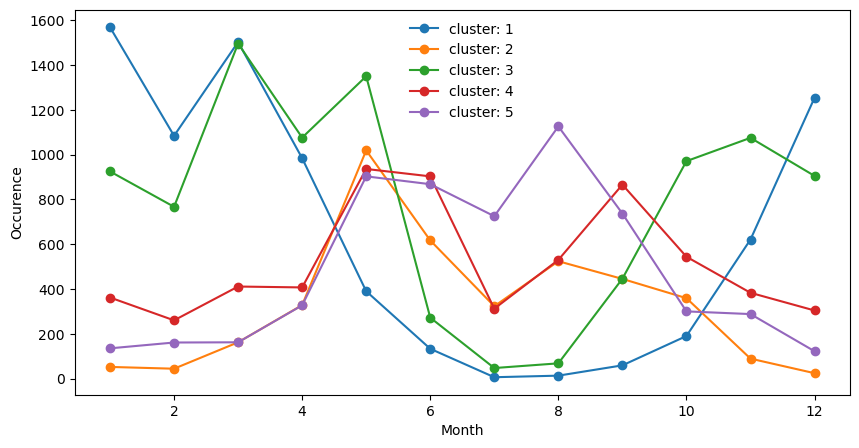

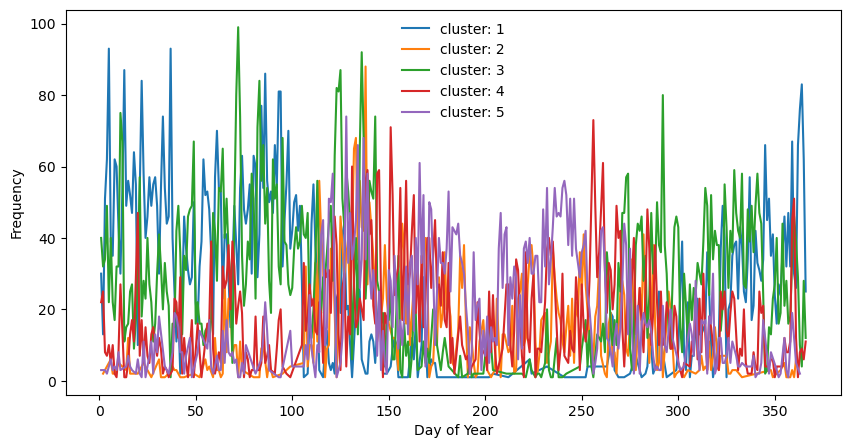

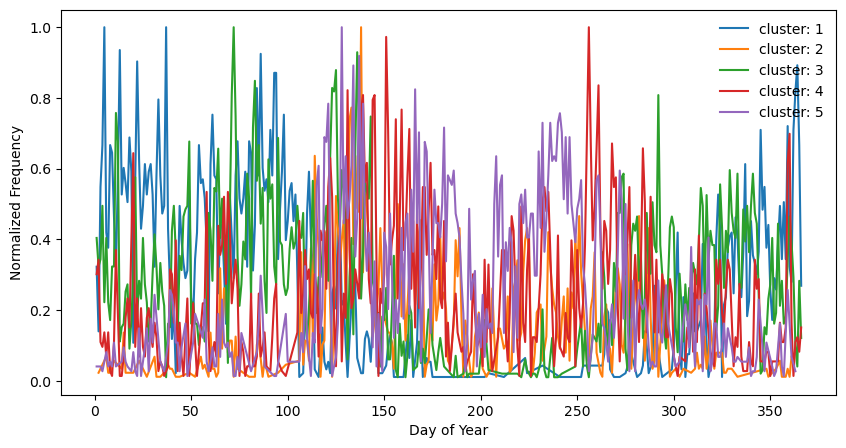

In [57]:
# Create a temporary copy of cluster-assigned data (normalized)
df_norm_clustered_1h_mean_copy = df_norm_clustered_1h_mean.copy()

clusters = [1, 2, 3, 4, 5]

fig, ax = plt.subplots(figsize=(10,5))

for cluster in clusters:
    df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
    df_cluster = df_cluster.copy()
    
    # Create a cloumn called month in dataframe
    df_cluster.loc[:,'month'] =  df_cluster.index.month
    
    # Calculate the occurence of cluster "cluster" per month
    df_cluster_count = df_cluster.groupby('month').count()
    
    ax.plot(df_cluster_count.index, df_cluster_count.iloc[:,0], 'o-', label='cluster: '+str(cluster))
    ax.set_xlabel('Month')
    ax.set_ylabel('Occurence')
    ax.legend(frameon=False)

fig, ax = plt.subplots(figsize=(10,5))

# Make stack plot from montly resample


fig, ax = plt.subplots(figsize=(10,5))

for cluster in clusters:
    df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
    df_cluster = df_cluster.copy()
    
    # Create a cloumn called month in dataframe
    df_cluster.loc[:,'month'] =  df_cluster.index.month
    
    # Calculate the occurence of cluster "cluster" per month
    df_cluster_count = df_cluster.groupby('month').count()
    
    ax.plot(df_cluster_count.index, df_cluster_count.iloc[:,0], 'o-', label='cluster: '+str(cluster))
    ax.set_xlabel('Month')
    ax.set_ylabel('Occurence')
    ax.legend(frameon=False)




# for cluster in clusters:
#     df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
#     df_cluster = df_cluster.copy()
    
#     # Create a column called day of year (DoY) which gives the day of the year 1 to 366
#     df_cluster.loc[:,'DoY'] = df_cluster.index.dayofyear
    
#     # Calculate the occurence of cluster "cluster" per month
#     df_cluster_count = df_cluster.groupby('DoY').count()
    
#     # Plot the occurence of cluster X vs the day of year
#     ax.plot(df_cluster_count.index, df_cluster_count.iloc[:,0], '-', label='cluster: '+str(cluster))
#     ax.set_xlabel('Day of Year')
#     ax.set_ylabel('Frequency')
#     ax.legend(frameon=False) 
    
# fig, ax = plt.subplots(figsize=(10,5))


# # Normalized

# for cluster in clusters:
#     df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
#     df_cluster = df_cluster.copy()
    
#     # Create a column called day of year (DoY) which gives the day of the year 1 to 366
#     df_cluster.loc[:,'DoY'] = df_cluster.index.dayofyear
    
#     # Calculate the occurence of cluster "cluster" per month
#     df_cluster_count = df_cluster.groupby('DoY').count()
    
#     # Plot the occurence of cluster X vs the day of year
#     ax.plot(df_cluster_count.index,
#             df_cluster_count.iloc[:,0]/df_cluster_count.iloc[:,0].max(),
#             '-', label='cluster: '+str(cluster))
    
#     ax.set_xlabel('Day of Year')
#     ax.set_ylabel('Normalized Frequency')
#     ax.legend(frameon=False) 
    



In [219]:
df_clusters_month = pd.DataFrame(columns=clusters)
print(df_clusters_month)
for cluster in clusters:
    df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
    df_cluster = df_cluster.copy()    
    df_cluster.loc[:,'month'] =  df_cluster.index.month    
    # Calculate the occurence of cluster "cluster" per month
    df_cluster_count = df_cluster.groupby('month').count()    
    monthly_occurance = df_cluster_count.iloc[:,0].values
    print(monthly_occurance)
    df_clusters_month[cluster] = monthly_occurance

Empty DataFrame
Columns: [1, 2, 3, 4, 5]
Index: []
[1569 1084 1503  984  390  133    6   13   59  190  621 1254]
[  52   44  162  328 1019  617  323  524  445  359   89   24]
[ 925  767 1496 1076 1350  272   47   68  446  971 1075  905]
[362 260 411 407 936 903 312 530 866 544 383 304]
[ 135  161  162  327  903  868  725 1126  737  300  288  122]


In [220]:
df_clusters_month['total_freq'] = df_clusters_month.sum(axis=1)

In [223]:
df_clusters_month

,1,2,3,4,5,total_freq
0,1569,52,925,362,135,3043
1,1084,44,767,260,161,2316
2,1503,162,1496,411,162,3734
3,984,328,1076,407,327,3122
4,390,1019,1350,936,903,4598
5,133,617,272,903,868,2793
6,6,323,47,312,725,1413
7,13,524,68,530,1126,2261
8,59,445,446,866,737,2553
9,190,359,971,544,300,2364


In [224]:
df_clusters_month = df_clusters_month.div(df_clusters_month['total_freq'], axis=0)

In [236]:
.index

DatetimeIndex(['2010-08-03', '2010-08-08', '2010-08-09', '2010-08-10',
               '2010-08-11', '2010-08-12', '2010-08-13', '2010-08-17',
               '2010-08-18', '2010-08-19',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='DateTime', length=2765, freq=None)

([<matplotlib.axis.XTick at 0x1ed45b31760>,
 [Text(0, 0, 'J'),
  Text(1, 0, 'F'),
  Text(2, 0, 'M'),
  Text(3, 0, 'A'),
  Text(4, 0, 'M'),
  Text(5, 0, 'J'),
  Text(6, 0, 'J'),
  Text(7, 0, 'A'),
  Text(8, 0, 'S'),
  Text(9, 0, 'O'),
  Text(10, 0, 'N'),
  Text(11, 0, 'D')])

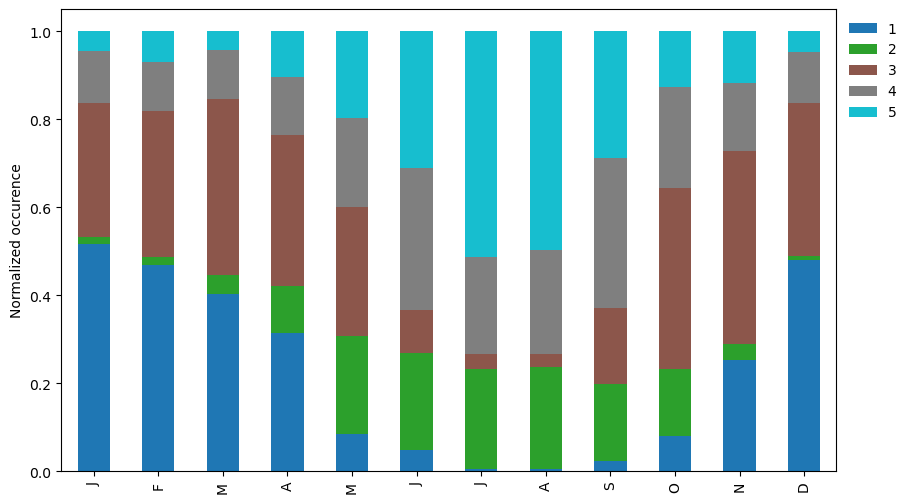

In [235]:
df_clusters_month[clusters].plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

#plt.legend(loc="upper left", ncol=2)

plt.ylabel("Normalized occurence")

plt.legend(frameon=False,bbox_to_anchor=(1, 1))
plt.xticks(np.arange(0, 12, 1), ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'],)


In [59]:
df_cluster.loc[:,'date'] = df_cluster.index.map(datetime.datetime.toordinal) 
df_cluster.loc[:,'date'] = df_cluster.loc[:,'date'] - df_cluster.loc[:,'date'][0] + 1

In [60]:
 df_cluster

,norm5.623,norm6.31,norm7.079,norm7.943,norm8.913,norm10.0,norm11.22,norm12.589,norm14.125,norm15.849,...,norm281.838,norm316.228,norm354.813,norm398.107,norm446.684,norm501.187,norm562.341,clusters,DoY,date
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-11-29 02:00:00,1.397330e-30,1.396107e-30,1.394730e-30,1.393176e-30,1.391425e-30,5.593612e-02,2.207670e-02,1.320783e-02,0.067817,0.267568,...,4.481560e-02,7.612067e-02,2.319647e-02,1.956029e-02,3.991228e-02,3.702531e-03,4.750763e-03,5,333,1
2010-11-29 03:00:00,1.622979e-30,1.621558e-30,1.619958e-30,1.618154e-30,1.616120e-30,1.657179e-30,1.654521e-30,1.651210e-30,0.025039,0.173721,...,1.741167e-03,8.840765e-03,1.980834e-03,1.134928e-30,1.112633e-30,1.089849e-30,1.069059e-30,5,333,1
2010-11-29 14:00:00,7.436234e-30,7.429738e-30,7.422419e-30,7.414167e-30,7.404863e-30,1.766239e-01,4.242215e-01,2.134443e-01,0.133257,0.348503,...,5.601617e-30,5.464532e-30,5.334366e-30,5.212571e-30,5.099304e-30,4.994795e-30,4.899423e-30,5,333,1
2010-11-29 19:00:00,2.455032e-30,2.452886e-30,2.450430e-30,2.381954e-02,6.873638e-01,3.934990e-01,3.509358e-02,2.917426e-01,0.511512,0.635719,...,1.041554e-02,1.803857e-30,1.759171e-30,1.720791e-30,1.683405e-30,1.648911e-30,1.617433e-30,5,333,1
2010-11-29 20:00:00,1.434683e-30,1.433429e-30,1.432017e-30,1.430424e-30,1.428628e-30,1.464925e-30,1.462578e-30,1.459654e-30,0.007101,0.064625,...,3.079099e-03,1.563411e-02,3.502929e-03,2.957184e-03,8.840147e-03,1.702501e-02,1.345749e-02,5,333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 12:00:00,1.572099e-02,8.545368e-31,1.842866e-03,5.420388e-02,3.734609e-04,1.386192e-01,2.573825e-01,1.976320e-01,0.146133,0.134854,...,1.353689e-01,4.853971e-02,5.696125e-02,9.552684e-02,1.300708e-01,7.941727e-02,2.774690e-02,5,359,3679
2020-12-24 13:00:00,7.328346e-02,4.991844e-02,3.254505e-03,9.572412e-02,4.198755e-02,9.580375e-02,1.760638e-01,2.367499e-01,0.268562,0.260445,...,3.779766e-02,1.125373e-01,1.148619e-01,1.060366e-01,7.728080e-02,5.178895e-02,6.173554e-02,5,359,3679
2020-12-24 18:00:00,9.215198e-31,3.628842e-02,1.389039e-01,1.757874e-01,5.160980e-02,1.373726e-01,2.607360e-01,4.160325e-01,0.315901,0.277837,...,1.058868e-01,6.853459e-03,3.743427e-31,3.667957e-31,3.583764e-31,3.307187e-02,3.745457e-02,5,359,3679


## Attempt to integrate with trapezoidal rule to find the ratio $N_{<30}/N_{tot}$

In [ ]:
# diameter_list = list(diameters)
# df_daily_2010_2020_median[cols]

# df_daily_2010_2020_median['diameter_list'].values

In [ ]:
# This array will contain the trpezioidal integration of total distribution 
ntot_trap_mean = 9999*np.ones((1,len(df_daily_2010_2020_mean))) 


In [ ]:
# Integrating over all daily median distributions = N_tot daily

# bin_cols = get_bins(bin_col_names_2010_2020)

# def add_trapz_integration(diameters, df_daily_2010_2020_median):
    
#     list_of_areas = []
#     diameter_list = list(diameters)
    
#     for i in np.arange(0,len(df_daily_2010_2020_median)):
#         df_tmp_median = df_daily_2010_2020_median.iloc[i, 3:-1]
        
#         ys = df_tmp_median.values[~np.isnan(df_tmp_median.values)]
#         xs = np.array(diameters[~np.isnan(df_tmp_median.values)])
                
#         trap_tmp = np.trapz(ys, , dx=1.0, axis=- 1)
        
#         # Becuse we integrate over the lognormal distribution, we have to denormalize by multiplying 
#         list_of_areas.append(trap_tmp)
    
#     # Make a copy of dataframe to wich the trapz area is added
#     df_with_added_area = df_daily_2010_2020_median.copy(deep = True)
#     df_with_added_area['area'] = list_of_areas
# return df_with_added_area

In [ ]:
#df_trapz_area_median = add_trapz_integration(df_daily_2010_2020_median)

## Compare the trapz integration 
#### (should correspond to the $N_{tot}$ dataframe column)

In [ ]:
# # I want to make a scatter plot 


# plt.plot(df_trapz_area_median['area'].values, df_trapz_area_median['Ntot'],'o')
# plt.xlabel('Trapezoidal area')
# plt.ylabel('$N_{tot}$')